In [14]:
from modelclass import model

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
mmodel,baseline = model.modelload('data/npl_mf',run=True,keep='Baseline',silent=1)

Zipped file read:  C:\modelflow manual raw models\npl\data\NPL_MF.pcim


In [4]:
mmodel.model_description

''

In [5]:
for oilshock in [10, 20 , 30]:
    print(f'Simulate oil shock: {oilshock}')
    oilshockdf = baseline.upd(f'<2025> WLDFCRUDE_PETRO + {oilshock}')
    tempdf = mmodel(oilshockdf,silent=1,keep=f'Oilshock =  {oilshock}') 

Simulate oil shock: 10
Simulate oil shock: 20
Simulate oil shock: 30


In [6]:
lookat =  mmodel['#Headline'].names + ['*REER  *GGBALPRIMCN *CCEMISCO2TKN WLDFCRUDE_PETRO']

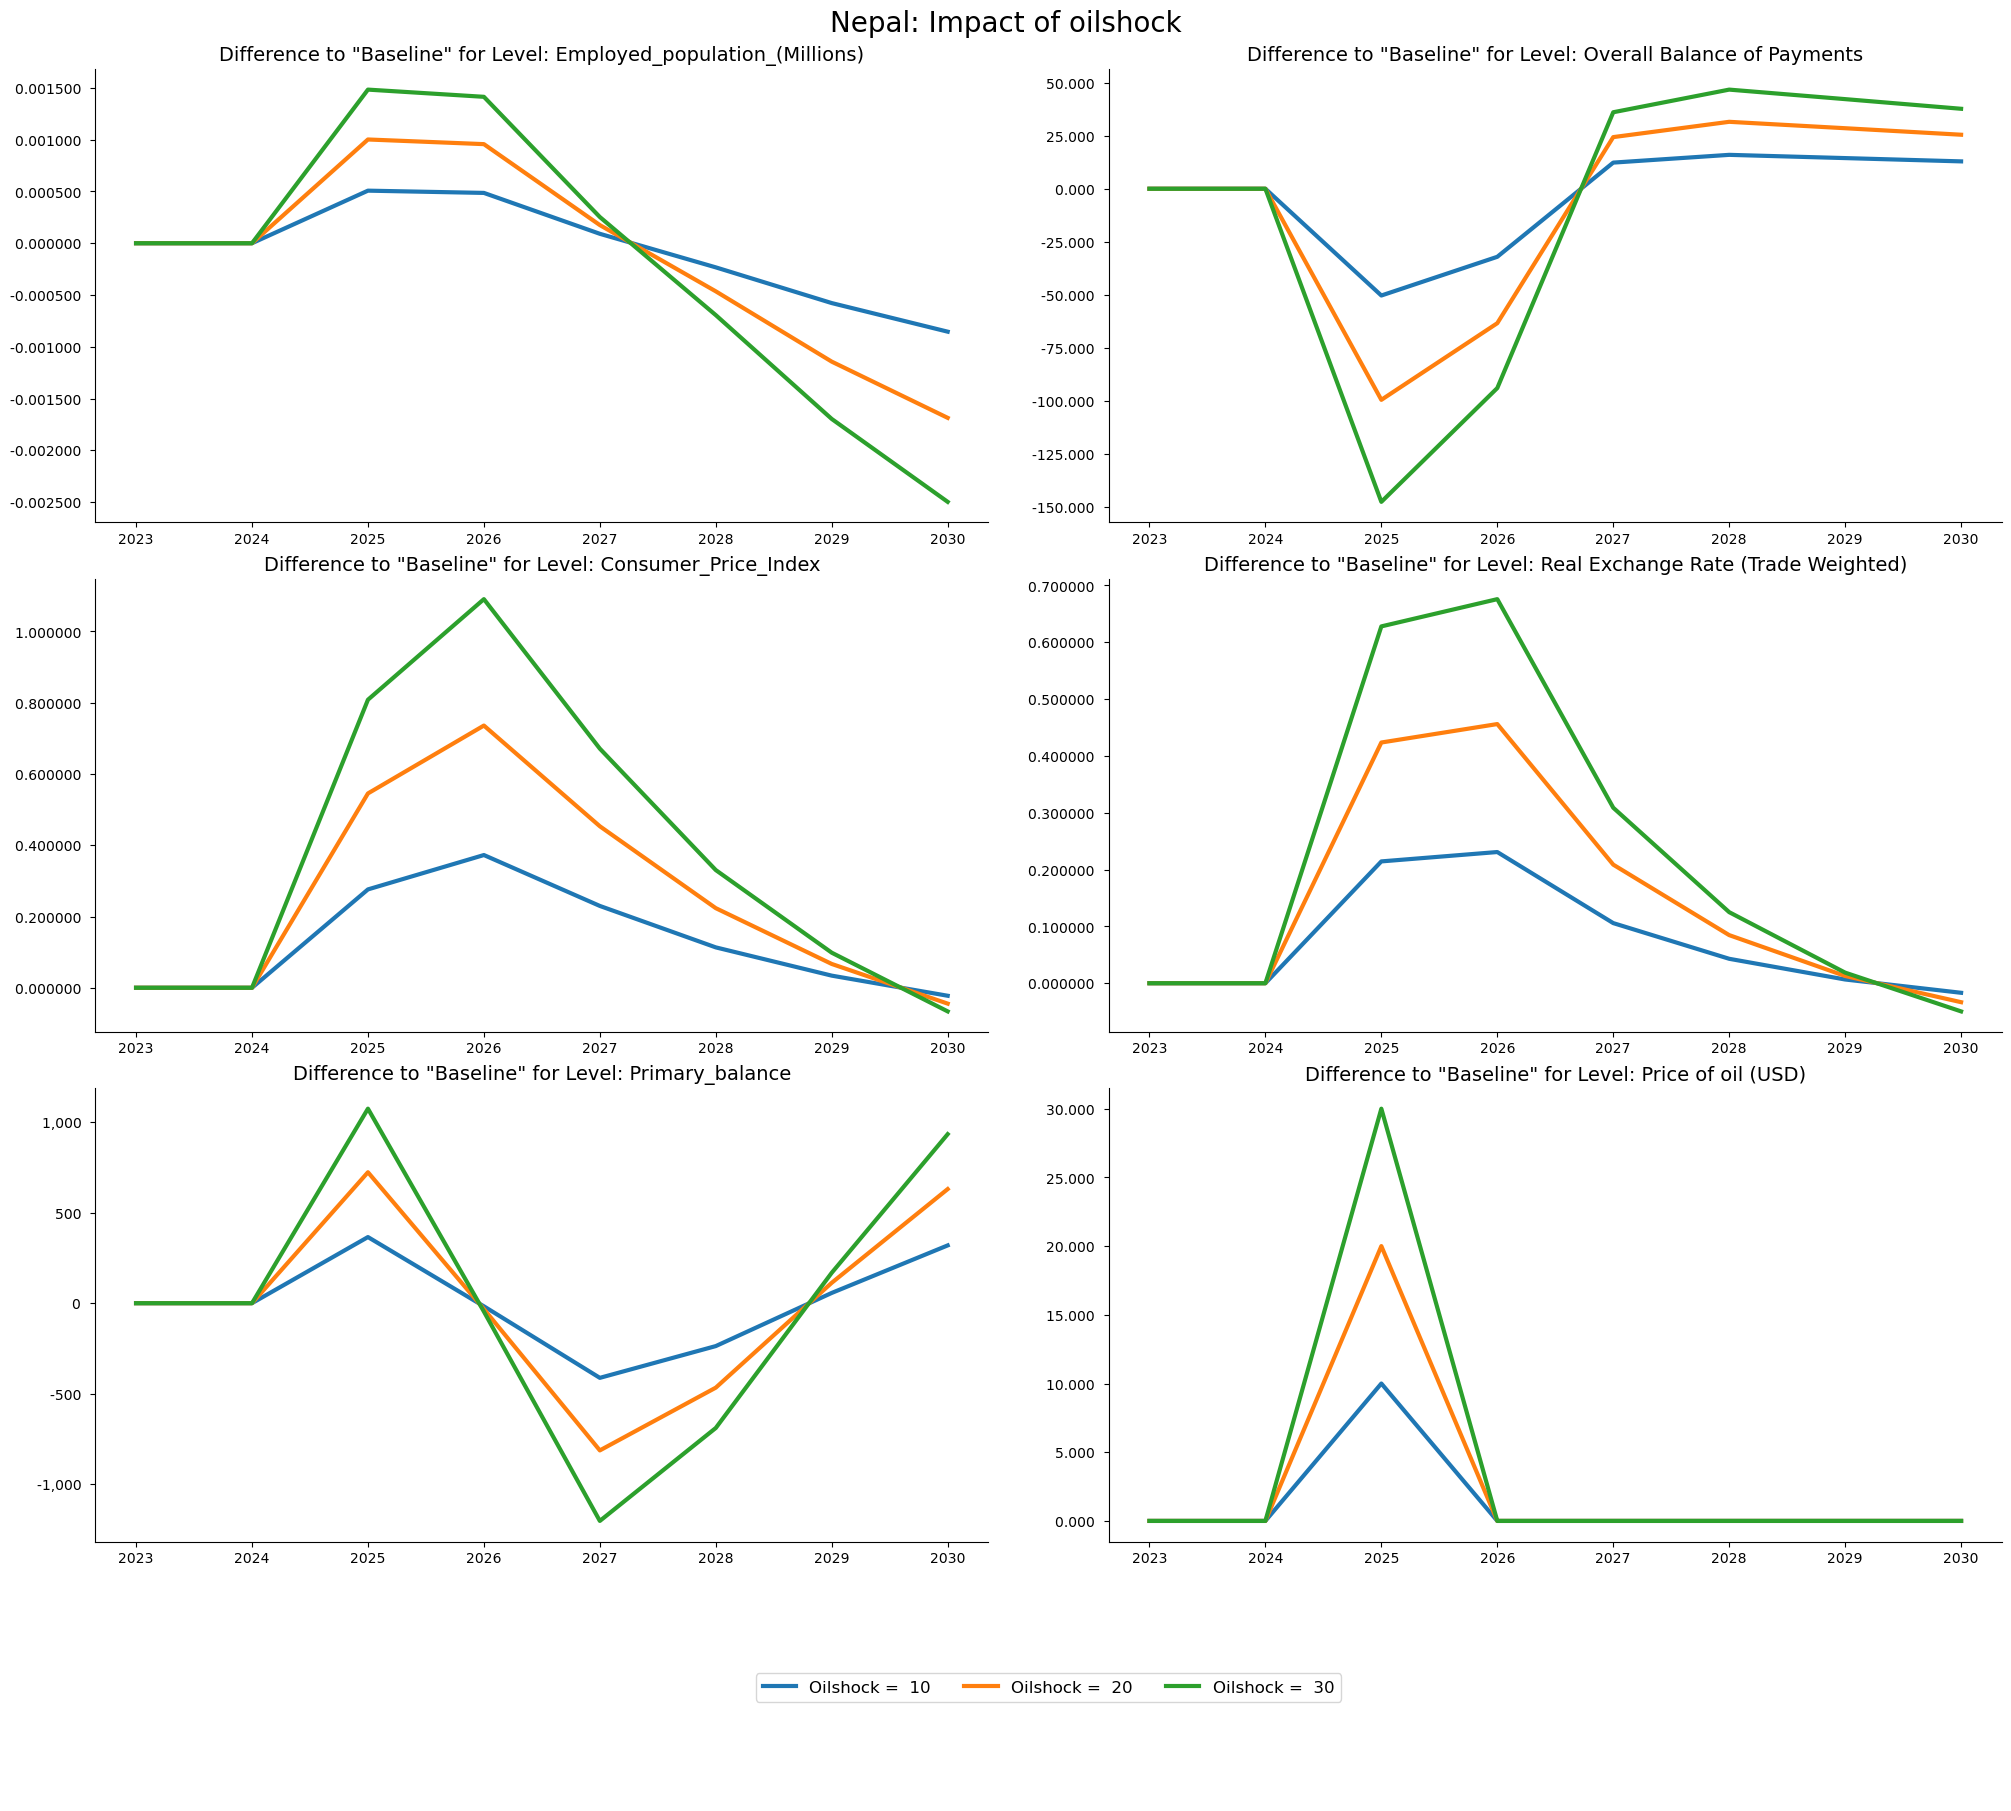

In [12]:
figs = mmodel.keep_plot(lookat,diff=True,samefig=1,title=f'Nepal: Impact of oilshock',legend=1);

In [13]:
mmodel.savefigs(figs,extensions= ['pdf','svg'],xopen=False,addname='_oil_dif')

'Saved at: c:\\modelflow manual raw models\\npl\\graph\\experiment1'

Finding eigenvalues and vectors


Invert (I-A):   0%|          | 0/8 [00:00<?, ?it/s]

Calculate  Eigenvalues:   0%|          | 0/8 [00:00<?, ?it/s]

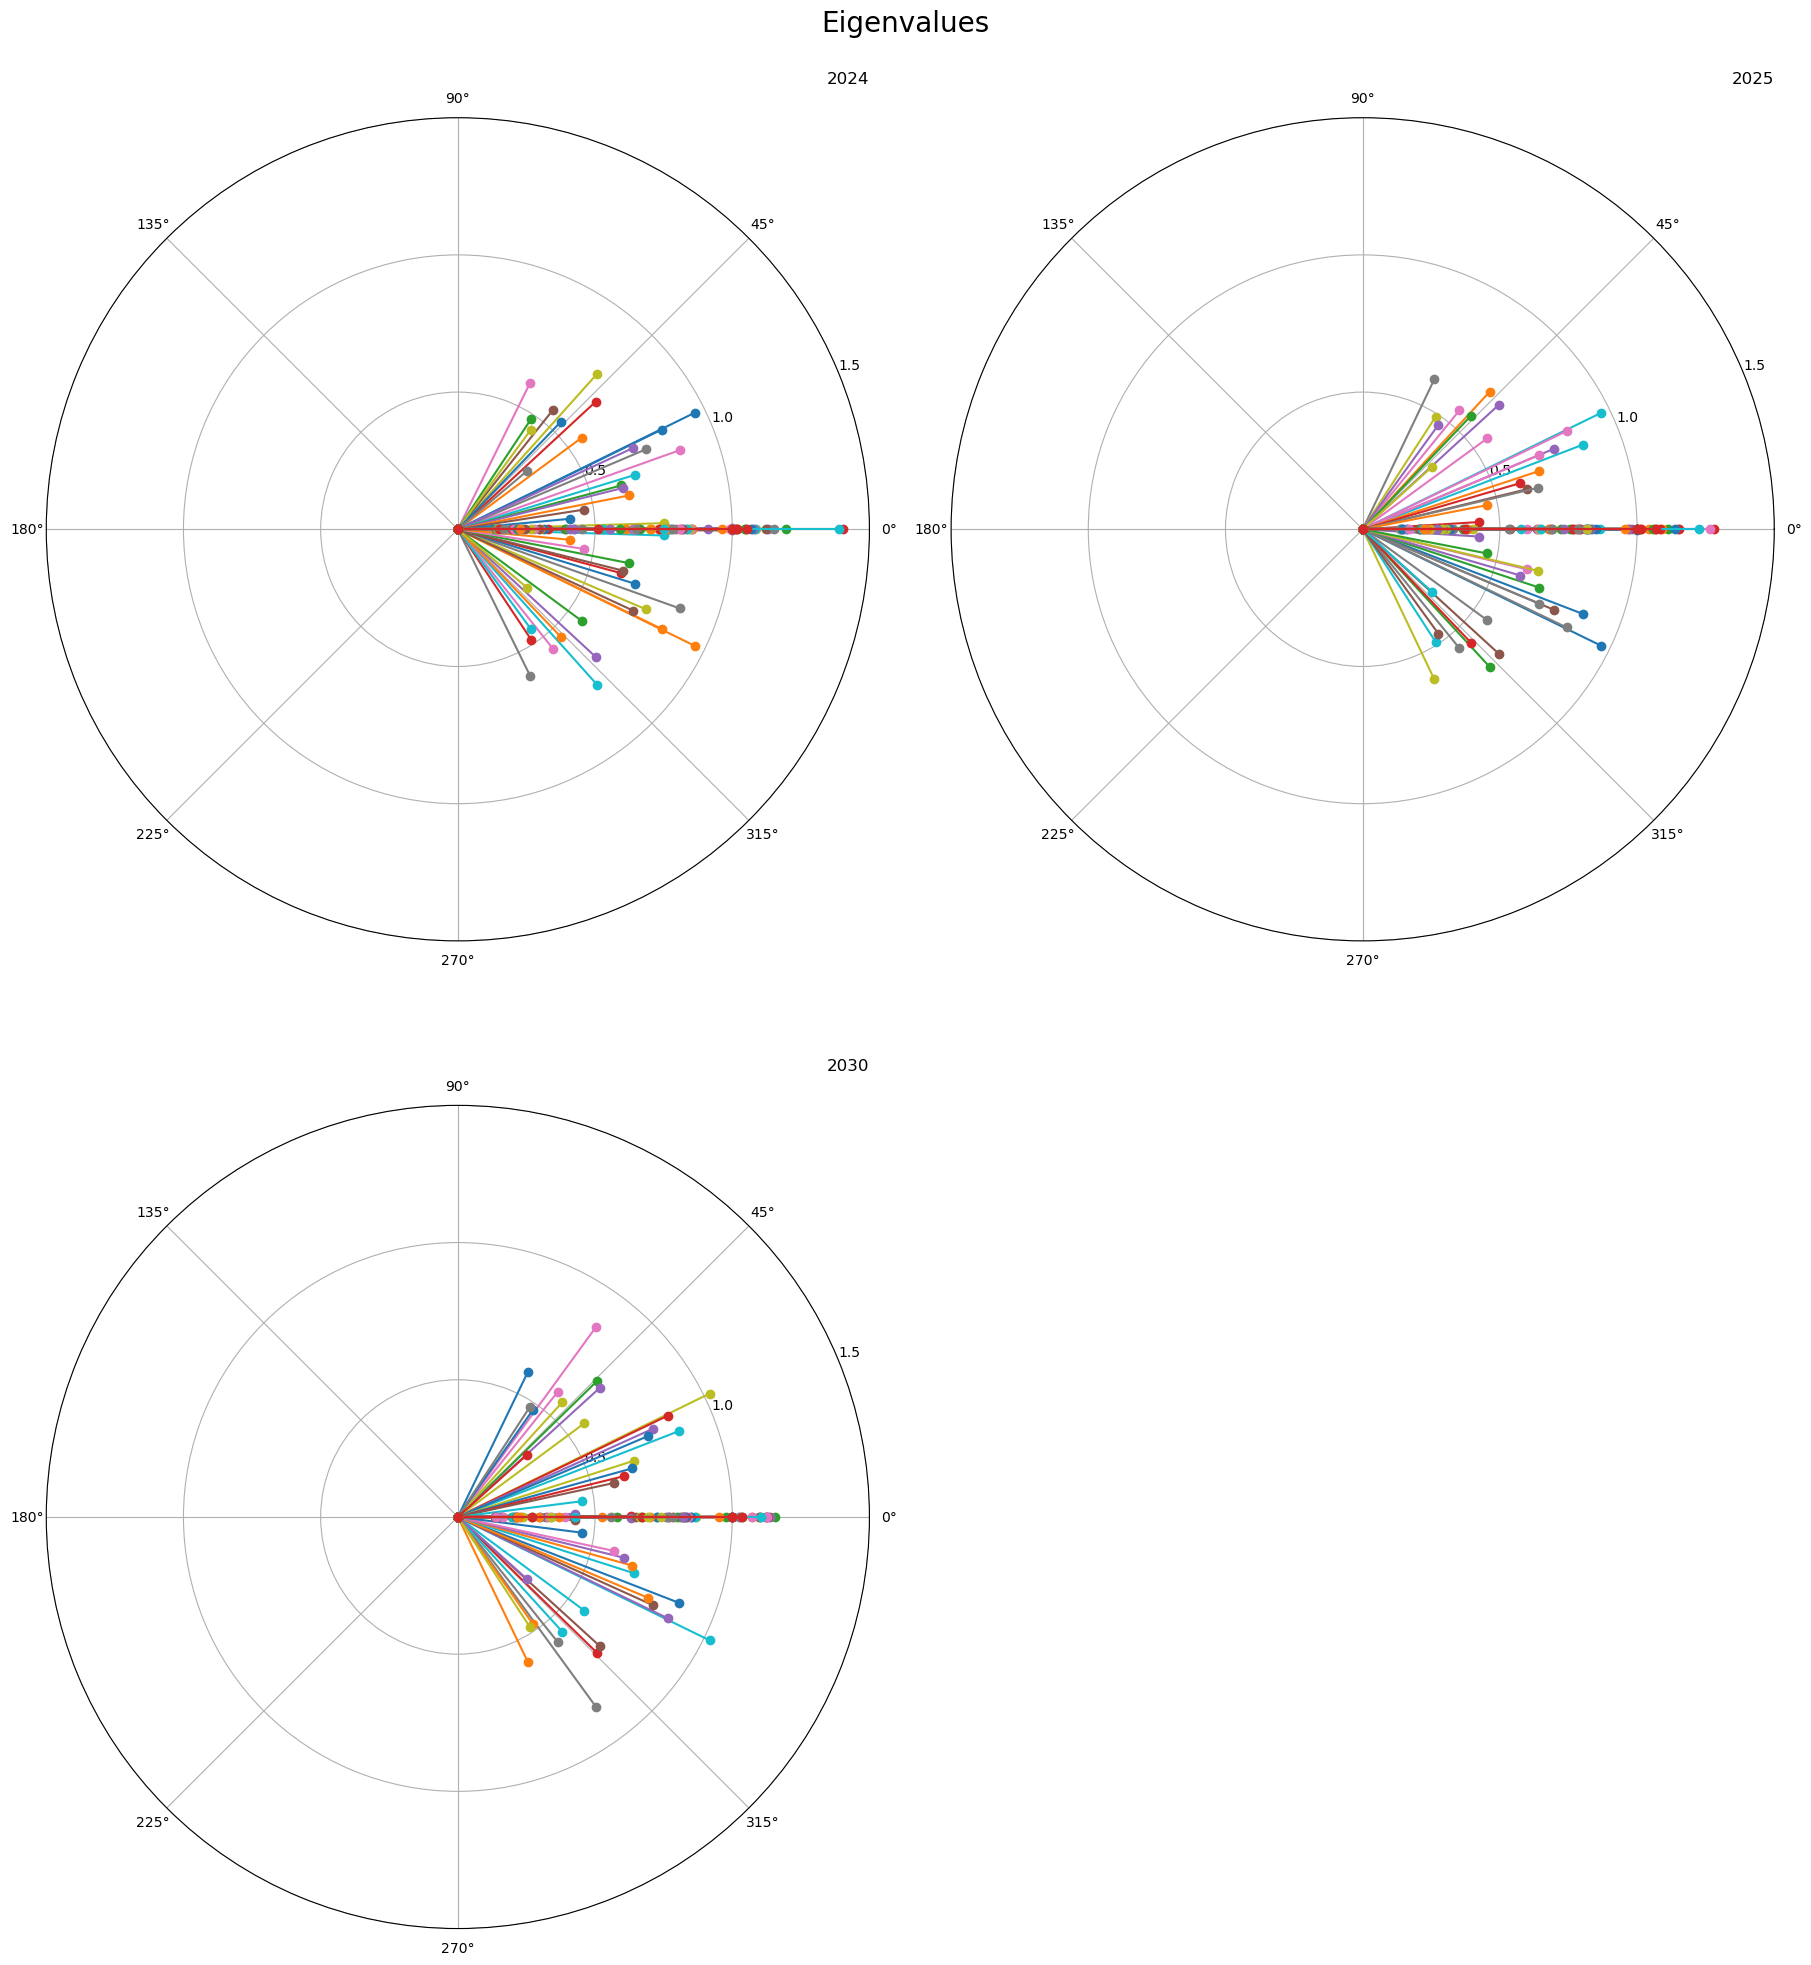

In [10]:
mmodel.eigenvalues_plot(periode=[2024,2025,2030,2031,2050]);

In [ ]:
mmodel['!primary*'].names

In [11]:
mmodel.eigenvalues_show() 

In [ ]:
jackdf = midn.stability_newton.get_eigen_jackknife_df(periode = (2030))

In [ ]:
jackdf.info() 

In [ ]:
def get_unique_excluded(df, year, excluded_col='excluded', description_col='excluded_description'):
    """
    Filters the DataFrame for a specific year and returns unique values of 'excluded' and their descriptions,
    where no row in the group satisfies both conditions (length > 1 and imagvalue > 0).

    Args:
    df (pandas.DataFrame): The DataFrame to process.
    year (int): The year to filter the DataFrame.
    excluded_col (str): The name of the column containing excluded variables. Default is 'excluded'.
    description_col (str): The name of the column containing descriptions of excluded variables. Default is 'excluded_description'.

    Returns:
    tuple: A tuple containing two arrays - unique excluded descriptions and unique excluded variables.
    """
    # Filter DataFrame for the specified year and apply the conditions
    filtered_df = df.query('year == @year').groupby(excluded_col).filter(
        lambda x: ~((x['length'] > 1) & (x['imagvalue'] > 0)).any()
    )

    # Extract unique values
    unique_descriptions = filtered_df[description_col].unique()
    unique_variables = filtered_df[excluded_col].unique()

    return unique_descriptions, unique_variables

unique_excluded_descriptions, unique_excluded_variables = get_unique_excluded(jackdf, 2030)
print(unique_excluded_descriptions)

In [ ]:
jackdf.query('excluded =="NONE" & length > 1  & year == 2030').sort_values('length',ascending=False )

In [ ]:
def get_unique_excluded(df, year, excluded_col='excluded', description_col='excluded_description'):
    """
    Filters the DataFrame for a specific year and returns unique values of 'excluded' and their descriptions,
    where no row in the group satisfies both conditions (length > 1 and imagvalue > 0).

    Args:
    df (pandas.DataFrame): The DataFrame to process.
    year (int): The year to filter the DataFrame.
    excluded_col (str): The name of the column containing excluded variables. Default is 'excluded'.
    description_col (str): The name of the column containing descriptions of excluded variables. Default is 'excluded_description'.

    Returns:
    tuple: A tuple containing two arrays - unique excluded descriptions and unique excluded variables.
    """
    # Filter DataFrame for the specified year and apply the conditions
    filtered_df = df.query('year == @year').groupby(excluded_col).filter(
        lambda x: ~((x['length'] > 1) & (x['imagvalue'] > 0)).any()
    )
    print(filtered_df)
    # Extract unique values
    unique_descriptions = filtered_df[description_col].unique()
    unique_variables = filtered_df[excluded_col].unique()

    return unique_descriptions, unique_variables

unique_excluded_descriptions, unique_excluded_variables = get_unique_excluded(jackdf, 2030)
print(unique_excluded_descriptions)


In [ ]:
df = jackdf
# Grouping by 'year' and 'excluded' and finding the maximum 'length' for each group
max_length_per_year_and_excluded = df.groupby(['year', 'excluded'])['length'].max().reset_index()

# This will give you a new DataFrame with columns: 'year', 'excluded', and the maximum 'length' for each group.
print(max_length_per_year_and_excluded.sort_values('length'))

In [ ]:
midn.IDNENLCFGHGEKT  

In [ ]:
import pandas as pd

# Assuming `df` is your DataFrame.

# Sort the DataFrame by 'year', 'excluded', and then 'length' in descending order.
df_sorted = df.sort_values(by=['year', 'excluded', 'length'], ascending=[True, True, False])

# Group by 'year' and 'excluded' and then get the second largest length using .nth(1)
# because the DataFrame is already sorted in descending order by 'length'.
second_largest_length = df.groupby(['year', 'excluded']).nth(1) .reset_index()

# Select only the relevant columns if needed.
second_largest_length = second_largest_length[['year', 'excluded', 'length']]

print(second_largest_length)


In [ ]:
import pandas as pd

# Assuming `df` is your DataFrame.

# Sort the DataFrame by 'year', 'excluded', and then 'length' in descending order.
df_sorted = df.sort_values(by=['year', 'excluded', 'length'], ascending=[True, True, False])

# Group by 'year' and 'excluded' and then get the second largest length using .nth(1)
# because the DataFrame is already sorted in descending order by 'length'.
second_largest_length = df_sorted.groupby(['year', 'excluded']).nth(0).reset_index()

# Select only the relevant columns if needed.
second_largest_length = second_largest_length[['year', 'excluded', 'length']].sort_values('length')

print(second_largest_length)


In [ ]:
midn.IDNENWSTGHGEKT  

In [ ]:

def jack_largest_reduction(jackdf,eigenvalue_row=0): 
    df_sorted = jackdf.sort_values(by=['year', 'excluded', 'length'], ascending=[True, True, False])

# Group by 'year' and 'excluded' and then get the second largest length using .nth(1)
# because the DataFrame is already sorted in descending order by 'length'.
    second_largest_length = df_sorted.groupby(['year', 'excluded']).nth(eigenvalue_row).reset_index()

# Select only the relevant columns if needed, and sort by 
    second_largest_length = second_largest_length[['year', 'excluded', 'length', 'excluded_description','realvalue','imagvalue']].sort_values('length')

    return second_largest_length

jack_largest_reduction(jackdf,3).head(100)

In [ ]:
midn.stability_newton.jack_largest_reduction_plot(jackdf,30)

In [ ]:
import plotly.graph_objs as go
from ipywidgets import Output
from IPython.display import display
import pandas as pd

# Sample data
df = pd.DataFrame({
    'excluded': ['A', 'B', 'NONE', 'C', 'D'],
    'length': [1, 2, 3, 4, 5]
})

# Create Plotly figure
fig = go.FigureWidget(data=[go.Scatter(x=df['length'], y=df['excluded'], mode='markers')])

# Output widget for displaying clicked data
out = Output()

def on_plot_click(trace, points, selector):
    with out:
        out.clear_output()
        if points.point_inds:
            ind = points.point_inds[0]
            print(f"Excluded: {df.iloc[ind]['excluded']}\nLength: {df.iloc[ind]['length']}")

# Bind the click event and display
fig.data[0].on_click(on_plot_click)
display(fig, out)


In [ ]:
jackdf

In [ ]:


# Function to create a plot and set up interaction
def jack_largest_reduction_plot_interactive(jackdf, eigenvalue_row=0, periode=None):
    import plotly.graph_objs as go
    from ipywidgets import VBox, HTML
    import pandas as pd
    import numpy as np    
    result_df = midn.stability_newton.jack_largest_reduction(jackdf,eigenvalue_row=eigenvalue_row,periode=periode)
    result_df['Highlight'] = result_df['excluded'].apply(lambda x: 'NONE' if x == 'NONE' else 'Other')

    # Create a Plotly FigureWidget
    fig = go.FigureWidget(data=[
        go.Scatter(x=result_df['length'], y=result_df['excluded'], mode='markers' ,
                   marker=dict(color=result_df['Highlight'].map({'NONE': 'red', 'Other': 'blue'})))              
    ])
    
    fig.update_layout(
    yaxis=dict(showticklabels=False))
    
    # Info widget to display details on hover
    info_widget = HTML()
    
    # Function to update info widget on hover
    def update_info(trace, points, state):
        if points.point_inds:
            ind = points.point_inds[0]
            info = f"Excluded: {result_df.iloc[ind]['excluded_description']}<br>Length: {result_df.iloc[ind]['length']:.2f}<br>Imag: {result_df.iloc[ind]['imagvalue']:.2f}"
            info_widget.value = info
    
    # Bind the hover event
    for trace in fig.data:
        trace.on_hover(update_info)
    
    # Display the plot and the info widget using VBox for vertical layout
    display(VBox([fig, info_widget]))

# Example usage
jack_largest_reduction_plot_interactive(jackdf,40)
